# 1. Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 2. Data

In [2]:
#read data
df30 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-30.csv')
df30.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,14,2018-07-30 04:07:27,459,Kombinat,4,Bronowice Małe,2018-07-30 04:07:00,6.352185e+18,6351558574044454914,STOPPING,0,7.0
1,21,2018-07-30 04:10:05,466,PH,6,Kurdwanów P+R,2018-07-30 04:12:00,6.352185e+18,6351558574044508161,STOPPING,0,NaN
2,30,2018-07-30 04:13:28,423,Struga,4,Bronowice Małe,2018-07-30 04:13:00,6.352185e+18,6351558574044454914,STOPPING,0,8.0
3,34,2018-07-30 04:14:57,465,Zajezdnia Nowa Huta,6,Kurdwanów P+R,2018-07-30 04:13:00,6.352185e+18,6351558574044508161,PREDICTED,1,NaN
4,39,2018-07-30 04:16:47,423,Struga,21,Os.Piastów,2018-07-30 04:15:00,NaN,6351558574044860418,PLANNED,1,3.0


# Delays distribution

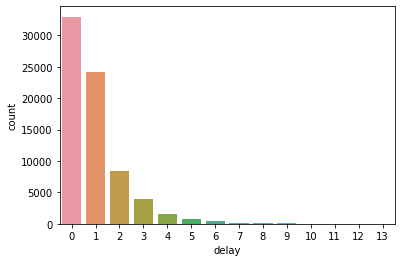

In [3]:
#plot histogram
sns.countplot(x='delay', data=df30)

In [4]:
#count how many vehicles were delayed by how many minutes
df30.delay.value_counts()

0     32979
1     24249
2      8374
3      4001
4      1637
5       794
6       373
7       184
8        73
9        48
10       33
11       11
13        8
12        8
Name: delay, dtype: int64

In [5]:
#normalized value of delayed vehicles
df30.delay.value_counts(normalize = True)

0     0.453183
1     0.333219
2     0.115072
3     0.054980
4     0.022495
5     0.010911
6     0.005126
7     0.002528
8     0.001003
9     0.000660
10    0.000453
11    0.000151
13    0.000110
12    0.000110
Name: delay, dtype: float64

In [6]:
#describe data
df30.delay.describe()

count    72772.000000
mean         0.944196
std          1.246442
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: delay, dtype: float64

# Delays over specific period of time

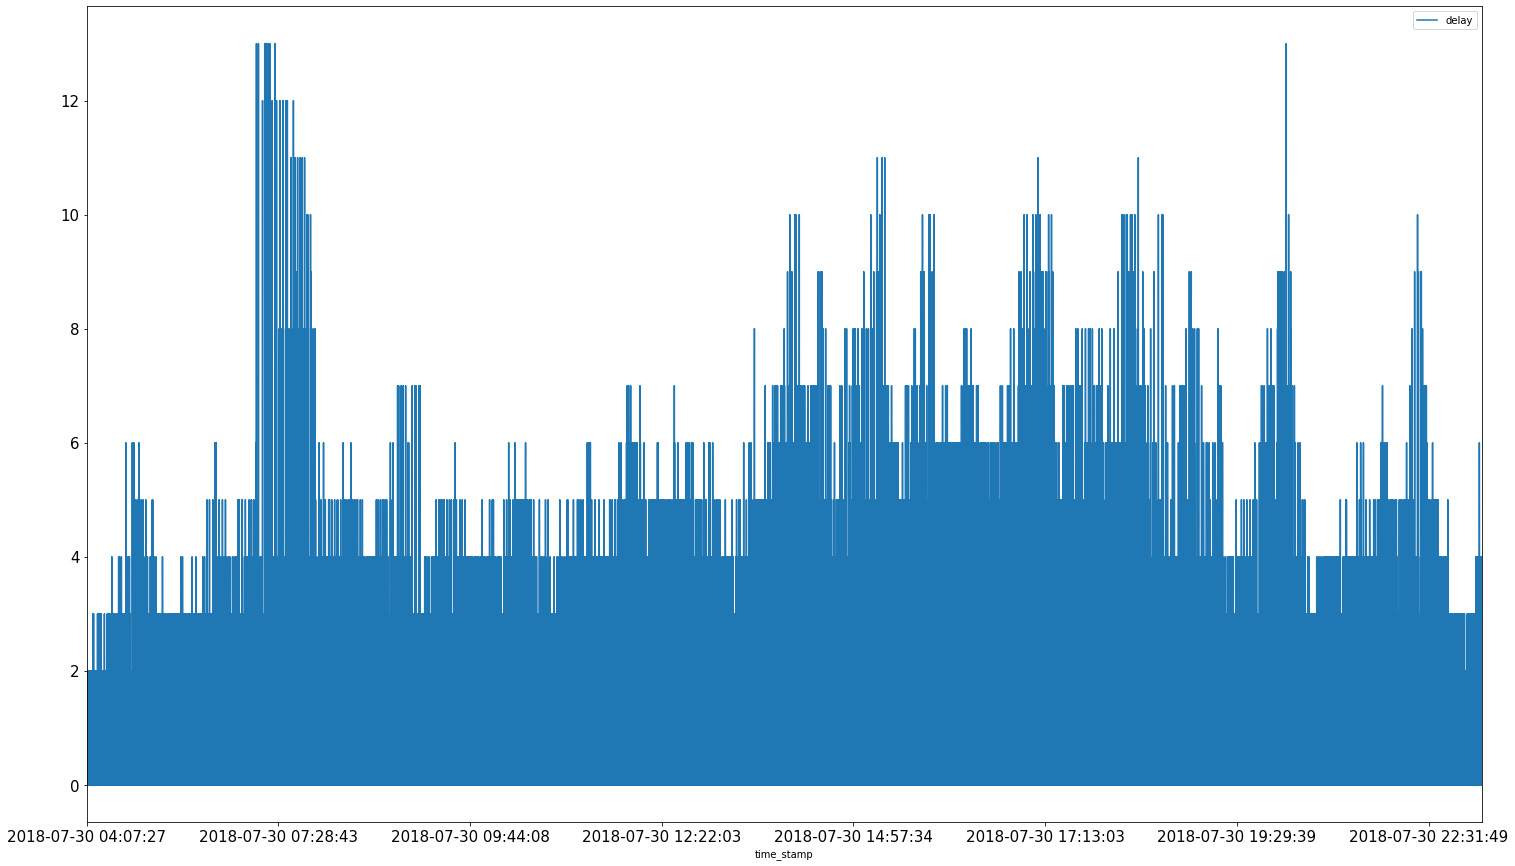

In [7]:
#plot delay over time stamp
df30.plot(x='time_stamp', y='delay', kind='line', figsize=(25,15), fontsize=15)

# Delays on tram stops

In [8]:
#mean delay for given stop
stopMeanDelay = df30.groupby('stopName').delay.mean().reset_index(name='stopMeanDelay')

In [9]:
stopMeanDelay

,stopName,stopMeanDelay
0,AWF,1.069527
1,Agencja Kraków Wschód,0.930000
2,Bardosa,0.707921
3,Batorego,1.274611
4,Białucha,1.132440
...,...,...
149,Ćwiklińskiej,0.537118
150,Łagiewniki,0.744224
151,Łagiewniki ZUS,1.647059
152,Św.Gertrudy,1.104749


In [10]:
stopMeanDelay.describe()

,stopMeanDelay
count,154.000000
mean,0.864389
std,0.355920
min,0.000000
25%,0.666062
50%,0.882234
75%,1.063297
max,1.647059


In [11]:
#mean delay sorted
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False)

,stopName,stopMeanDelay
151,Łagiewniki ZUS,1.647059
48,Kabel,1.629738
147,Zabłocie,1.618395
75,Nowosądecka,1.600000
89,Piaski Nowe,1.545961
...,...,...
67,Mały Płaszów,0.110345
14,Bronowice Małe,0.108209
23,Cmentarz Rakowicki,0.046296
20,Cichy Kącik,0.010101


In [12]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False).head(10)

,stopName,stopMeanDelay
151,Łagiewniki ZUS,1.647059
48,Kabel,1.629738
147,Zabłocie,1.618395
75,Nowosądecka,1.600000
89,Piaski Nowe,1.545961
72,Muzeum Lotnictwa,1.510981
53,Klimeckiego,1.499022
31,Dworcowa,1.484185
42,Gromadzka,1.475728
29,Dauna,1.458564


In [13]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=True).head(10)

,stopName,stopMeanDelay
87,PH,0.000000
20,Cichy Kącik,0.010101
23,Cmentarz Rakowicki,0.046296
14,Bronowice Małe,0.108209
67,Mały Płaszów,0.110345
25,Czerwone Maki P+R,0.122951
139,Walcownia,0.139535
59,Krowodrza Górka,0.141994
146,Wzgórza Krzesławickie,0.162921
76,Nowy Bieżanów P+R,0.220096


# Delays of tram lines

In [14]:
#mean delay by line
lineMeanDelay = df30.groupby(['number', 'direction']).delay.mean().reset_index(name='lineMeanDelay')

In [15]:
lineMeanDelay

,number,direction,lineMeanDelay
0,1,Salwator,0.657522
1,1,Wzgórza K.,0.752159
2,2,Cm. Rakowicki,0.261023
3,2,Salwator,0.510172
4,3,Dworzec Tow.,1.129167
5,3,Krowodrza Górka,0.768399
6,3,Nowy Bieżanów P+R,1.281336
7,4,Bronowice Małe,0.742197
8,4,Kombinat,0.192308
9,4,Wzgórza K.,0.894421


In [16]:
#mean delay by line sorted
lineMeanDelay.sort_values(by='lineMeanDelay')

,number,direction,lineMeanDelay
8,4,Kombinat,0.192308
2,2,Cm. Rakowicki,0.261023
20,11,Czerwone Maki P+R,0.333913
10,5,Krowodrza Górka,0.405449
44,44,Kombinat,0.458101
30,18,Krowodrza Górka,0.459471
39,22,Kombinat,0.460526
3,2,Salwator,0.510172
29,18,Czerwone Maki P+R,0.526405
33,20,Cichy Kącik,0.560446


In [17]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=False).head(10)

,number,direction,lineMeanDelay
47,50,Prokocim,1.671225
18,10,Kopiec Wandy,1.644847
13,6,Salwator,1.460880
40,22,Walcownia,1.423523
31,19,Borek Fałęcki,1.410129
6,3,Nowy Bieżanów P+R,1.281336
42,24,Kurdwanów P+R,1.229674
41,24,Bronowice Małe,1.204842
37,21,Os.Piastów,1.200653
46,50,Krowodrza Górka,1.169622


In [18]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=True).head(10)

,number,direction,lineMeanDelay
8,4,Kombinat,0.192308
2,2,Cm. Rakowicki,0.261023
20,11,Czerwone Maki P+R,0.333913
10,5,Krowodrza Górka,0.405449
44,44,Kombinat,0.458101
30,18,Krowodrza Górka,0.459471
39,22,Kombinat,0.460526
3,2,Salwator,0.510172
29,18,Czerwone Maki P+R,0.526405
33,20,Cichy Kącik,0.560446


In [19]:
#mean delay by number and direction
lineMeanDelay['number and direction'] = lineMeanDelay.agg('{0[number]} {0[direction]}'.format, axis=1)

In [20]:
lineMeanDelay

,number,direction,lineMeanDelay,number and direction
0,1,Salwator,0.657522,1 Salwator
1,1,Wzgórza K.,0.752159,1 Wzgórza K.
2,2,Cm. Rakowicki,0.261023,2 Cm. Rakowicki
3,2,Salwator,0.510172,2 Salwator
4,3,Dworzec Tow.,1.129167,3 Dworzec Tow.
5,3,Krowodrza Górka,0.768399,3 Krowodrza Górka
6,3,Nowy Bieżanów P+R,1.281336,3 Nowy Bieżanów P+R
7,4,Bronowice Małe,0.742197,4 Bronowice Małe
8,4,Kombinat,0.192308,4 Kombinat
9,4,Wzgórza K.,0.894421,4 Wzgórza K.


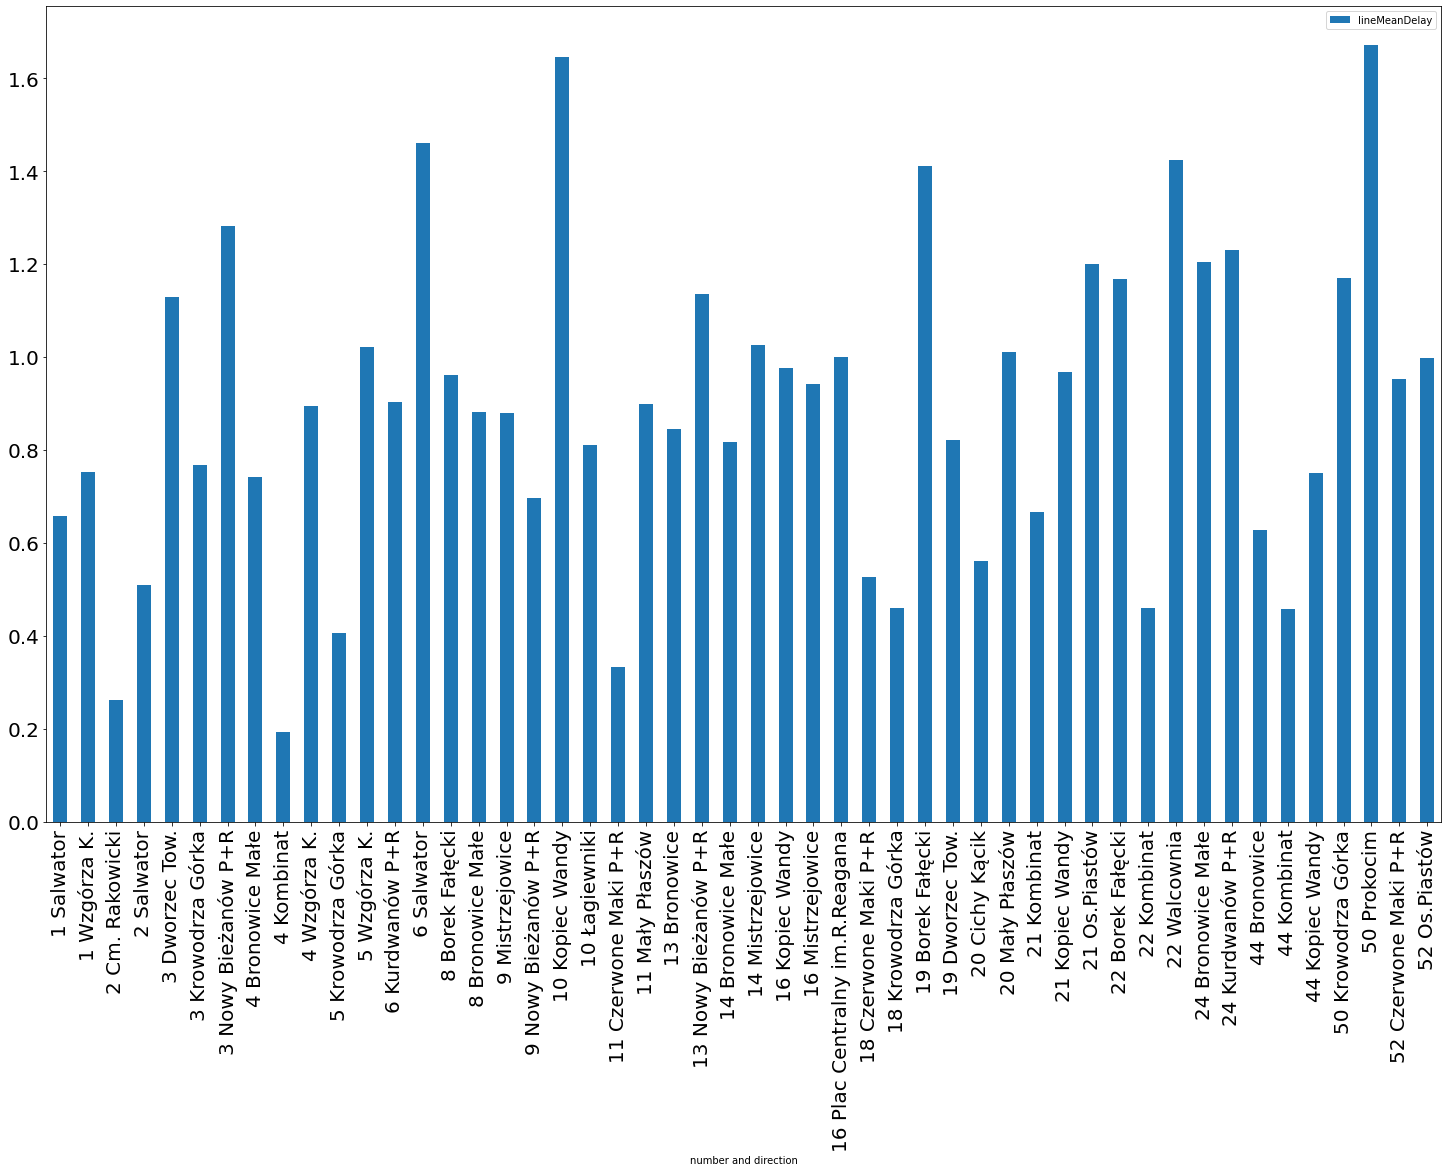

In [21]:
#mean delay by number and direction
lineMeanDelay.plot(x='number and direction', y='lineMeanDelay', kind='bar', figsize=(25,15), fontsize=20)

# Machine Learning model

In [22]:
#column display
df30.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [23]:
#conversion to datetime, sort delay by hour
df30['plannedTime'] = pd.to_datetime (df30['plannedTime'])
df30[['plannedTime']].info()

df30['plannedTime'].dt.hour.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72772 entries, 0 to 72771
Data columns (total 1 columns):
plannedTime    72772 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 568.7 KB


17    4495
7     4477
16    4473
8     4463
15    4401
18    4398
6     4331
9     4289
19    3971
14    3963
12    3822
13    3813
11    3780
10    3746
20    3443
21    3066
5     3046
22    2845
23    1409
4      524
0       17
Name: plannedTime, dtype: int64

In [24]:
df30['delay_secs'] = df30['delay'].map(lambda x: x*60) #change delay to seconds
df30['direction_cat'] = df30['direction'].factorize()[0] #factorize direction
df30['vehicleId'].fillna(-1, inplace = True) #fill null with -1
df30['seq_num'].fillna(-1, inplace = True) #fill null with -1

def gen_id_num_direction(x):
    """
    This function combines two variables, i.e. tram number
    and direction in which this tram is going
    Input:
        x: dataframe
    Output:
        new feature combining tram number and direction  
    """
    return '{} {}'.format(x['number'], x['direction'])
df30['number_direction_id'] = df30.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
    """
    This function combines two variables, i.e. tram stop
    and direction in which this tram is going
    Input:
        x: dataframe
    Output:
        new feature combining tram stop and direction  
    """
    return '{} {}'.format(x['stop'], x['direction'])
df30['stop_direction_id'] = df30.apply(gen_id_stop_direction, axis = 1).factorize()[0]

#create combinations
feats1 = [
    'number'
]
X1 = df30[ feats1 ].values

feats2 = [
    'number',
    'stop'
]
X2 = df30[ feats2 ].values

feats3 = [
    'number',
    'stop',
    'direction_cat'
]
X3 = df30[ feats3 ].values

feats4 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId'
]
X4 = df30[ feats4 ].values

feats5 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num'
]
X5 = df30[ feats5 ].values

feats6 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id'
]
X6 = df30[ feats6 ].values

feats7 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'
]
X7 = df30[ feats7 ].values

y = df30['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0) #model
#cross validation scores for specific combinations
scores1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, X4, y, cv=5, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, X5, y, cv=5, scoring='neg_mean_absolute_error')
scores6 = cross_val_score(model, X6, y, cv=5, scoring='neg_mean_absolute_error')
scores7 = cross_val_score(model, X7, y, cv=5, scoring='neg_mean_absolute_error')

In [25]:
#value of error for specific combinations
Data = [(abs(np.mean(scores1))),
        (abs(np.mean(scores2))),
        (abs(np.mean(scores3))),
        (abs(np.mean(scores4))),
        (abs(np.mean(scores5))),
        (abs(np.mean(scores6))),
        (abs(np.mean(scores7)))]
        
df30 = pd.DataFrame(Data, index=['feats1','feats2','feats3','feats4','feats5','feats6','feats7'], columns=['np.mean'])

In [26]:
df30

,np.mean
feats1,52.501657
feats2,50.870876
feats3,48.684770
feats4,47.611281
feats5,46.554821
feats6,46.476108
feats7,46.344128


In [27]:
#search for best combination
minVal30 = df30.min()
 
print('Minimum value is: ')
print(minVal30)


minValInd30 = df30.idxmin()
 
print("Min value is at row index position:")
print(minValInd30)

Minimum value is: 
np.mean    46.344128
dtype: float64
Min value is at row index position:
np.mean    feats7
dtype: object


In [28]:
feats7

['number',
 'stop',
 'direction_cat',
 'vehicleId',
 'seq_num',
 'number_direction_id',
 'stop_direction_id']

In [29]:
#standard deviation for best combination
np.std(scores7)

3.7996936890663977